# Faces vs Non-Faces LDA

In [1]:
import numpy as np

In [2]:
import cv2
import os

# non-faces take the class label 1 and faces take the class label 2

In [3]:
def load_non_faces_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (92, 112))
        if img is not None:
            images.append(np.array(img.flatten()))
    images = np.array(images)
    return images

In [4]:
def load_faces_images_from_folder(folder):
    images = []
    for foldername in os.listdir(folder):
        folder_path = os.path.join(folder, foldername)
        for filename in os.listdir(folder_path):
            filepath = os.path.join(folder_path, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(np.array(img.flatten()))
    images = np.array(images)
    return images

In [5]:
import LDA as lda

In [6]:
print("Loading data")
face_data = load_faces_images_from_folder('/home/hussein/PatternDatasets/Faces')
print("Loading data")
non_face_data = load_non_faces_images_from_folder('/home/hussein/PatternDatasets/Nofaces/dataset/cars_vs_flowers/training_set/car')
print(face_data.shape)
print(non_face_data.shape)

Loading data
Loading data
(400, 10304)
(1000, 10304)


In [7]:
face_label = np.array(['2'] * len(face_data))
non_face_label = np.array(['1'] * len(non_face_data))

# Plot the accuracy of the classifier as a function of the number of non-face training examples

In [8]:
num_face_train = 200
num_non_face_train = [100, 150, 200, 250, 300, 350,400]
num_face_test = 200
num_non_face_test = 800
accuracy = []
y_pred = []
y_test = []
X_train = []
X_test = []
for i in num_non_face_train:
    data_train = np.concatenate((face_data[:num_face_train], non_face_data[:i]), axis=0)
    label_train = np.concatenate((face_label[:num_face_train], non_face_label[:i]), axis=0)
    data_test = np.concatenate((face_data[num_face_test:], non_face_data[num_non_face_test:]), axis=0)
    label_test = np.concatenate((face_label[num_face_test:], non_face_label[num_non_face_test:]), axis=0)
    X_combined_train = np.array(data_train)
    X_combined_test = np.array(data_test)
    y_combined_train = np.array(label_train)
    y_combined_test = np.array(label_test)
    #%%
    U = lda.LDA(X_combined_train, y_combined_train, 1)
    #%%
    Projected_train_Data = X_combined_train.dot(U)
    Projected_test_Data = X_combined_test.dot(U)
    #%%
    from sklearn.metrics import accuracy_score
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(Projected_train_Data, y_combined_train)
    y_combined_pred = knn.predict(Projected_test_Data)
    if i == 200:
        y_pred = y_combined_pred
        y_test = y_combined_test
        X_train = X_combined_train
        X_test = X_combined_test
    accuracy.append(accuracy_score(y_combined_test, y_combined_pred))
    print(f"Accuracy for {i} non faces is {accuracy_score(y_combined_test, y_combined_pred)}")

1
Number of Classes =  2
Eigen Values =  [ 9.16102819e+00+0.00000000e+00j  2.19918995e-15+0.00000000e+00j
  2.15996553e-15+4.11496235e-16j ... -1.72091057e-15-8.04677059e-16j
 -2.24094997e-15+3.19483164e-16j -2.24094997e-15-3.19483164e-16j]
Eigen Vectors =  [[ 0.00630599+0.00000000e+00j -0.00154873+0.00000000e+00j
   0.0016903 +4.22184184e-03j ...  0.01840391+8.92244187e-03j
   0.00602772-1.84220518e-03j  0.00602772+1.84220518e-03j]
 [ 0.00289041+0.00000000e+00j -0.03085805+0.00000000e+00j
   0.00178005+3.96105586e-03j ... -0.00225152-3.08903693e-03j
   0.01228778-8.18511131e-03j  0.01228778+8.18511131e-03j]
 [ 0.0055601 +0.00000000e+00j  0.01340651+0.00000000e+00j
   0.00569942-4.52193321e-05j ...  0.00302382-5.49502987e-03j
  -0.00198242+3.87465162e-03j -0.00198242-3.87465162e-03j]
 ...
 [ 0.01156449+0.00000000e+00j  0.00313108+0.00000000e+00j
   0.01330678+5.33676513e-04j ... -0.01038016+3.44326521e-03j
  -0.00696279-2.80586152e-03j -0.00696279+2.80586152e-03j]
 [ 0.00810258+0.00000

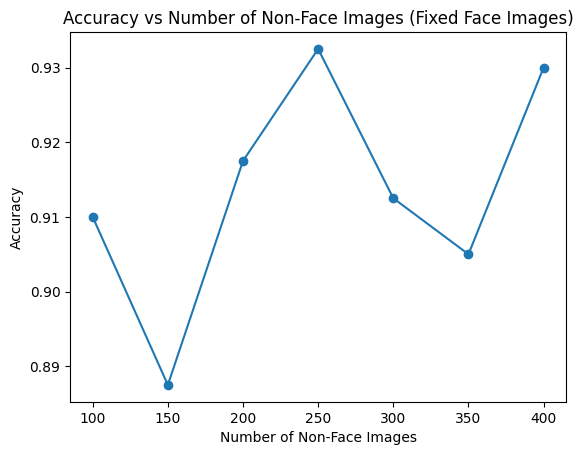

In [17]:
import matplotlib.pyplot as plt
plt.plot(num_non_face_train, accuracy, marker='o')
plt.xlabel('Number of Non-Face Images')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Non-Face Images (Fixed Face Images)')
plt.show()

# plot the success and failure cases

In [20]:
success = 0
failure = 0
success_cases = []
failure_cases = []
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        success += 1
        success_cases.append((X_test[i], "Face" if y_test[i] == '2' else "Non-Face", "Correct"))
    else:
        failure += 1
        failure_cases.append((X_test[i], "Face" if y_test[i] == '2' else "Non-Face", "Incorrect"))
print(f"Success = {success}")
print(f"Failure = {failure}")

Success = 367
Failure = 33


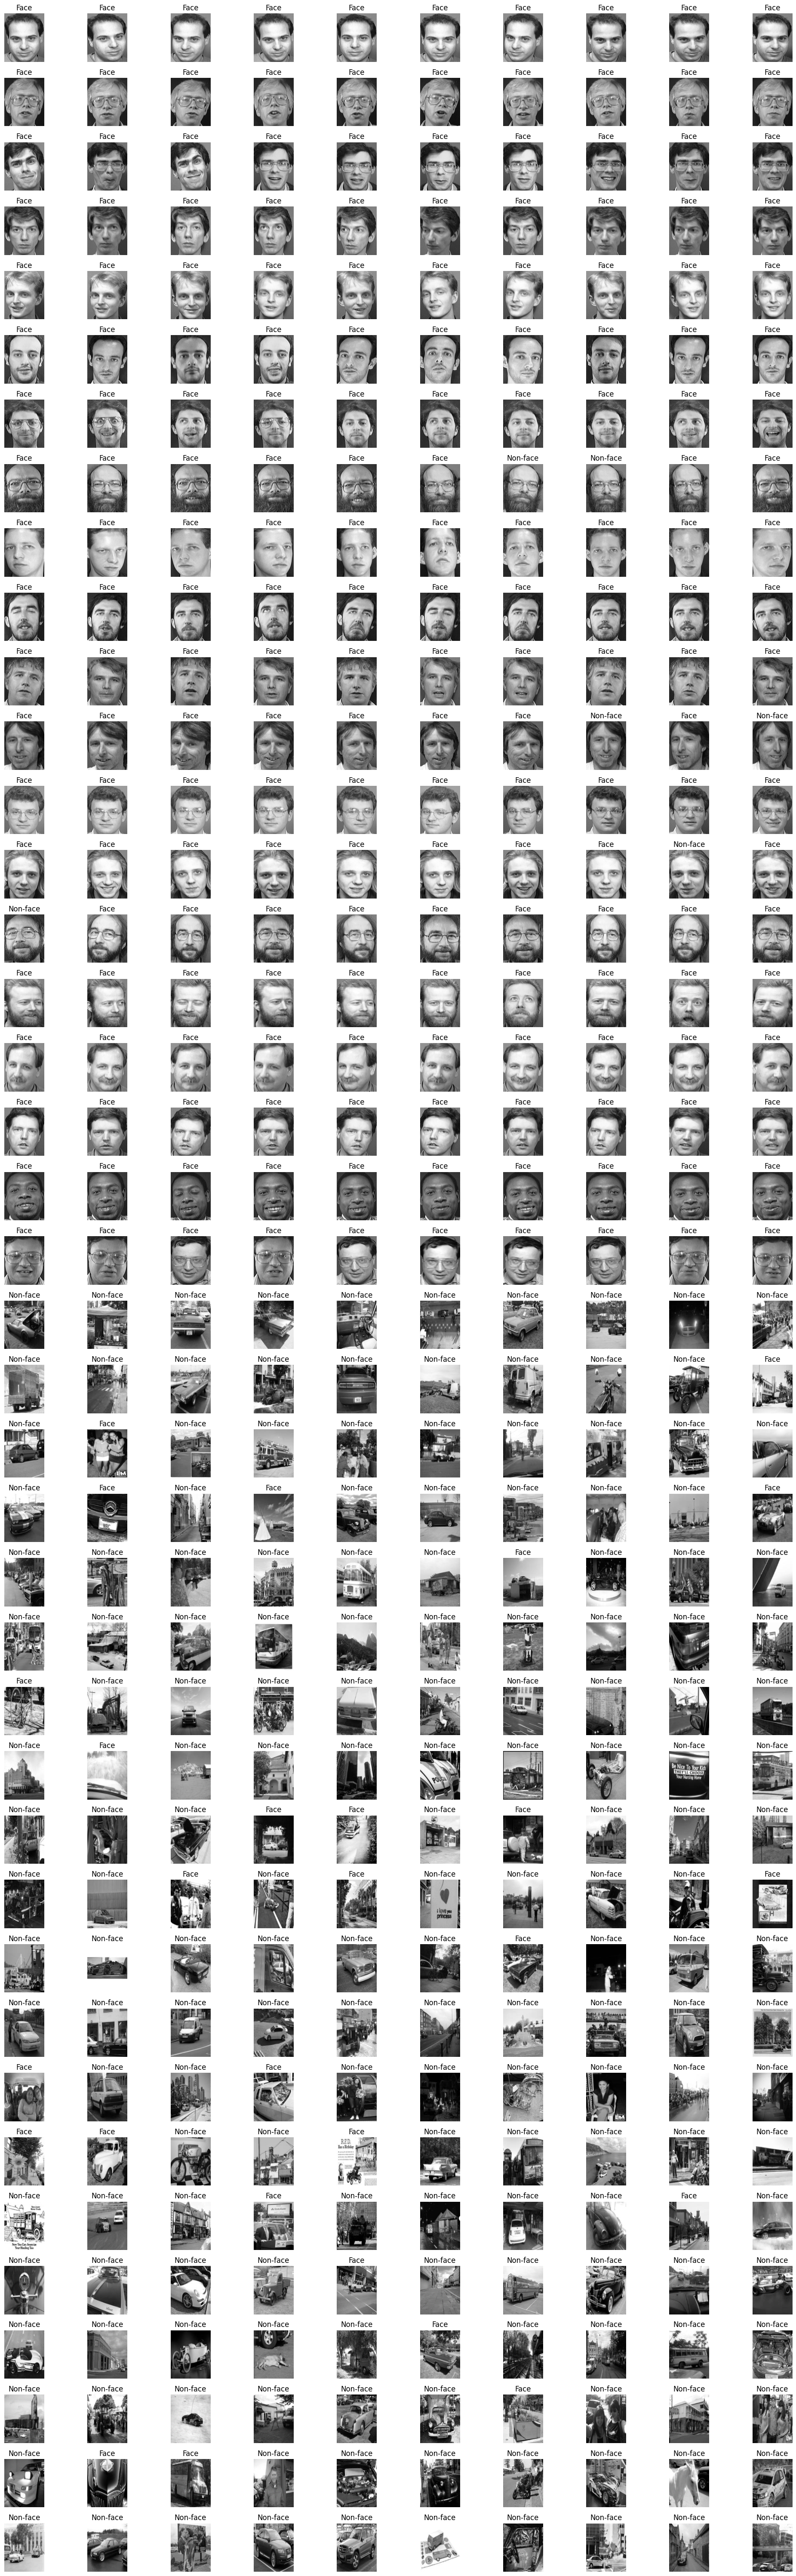

In [21]:

def visualize_data_with_labels(data, labels, num_rows, num_columns, image_height, image_width, figsize=(15, 40), image_scale=1.5):
    # Reshape the data to the appropriate dimensions
    data = data.reshape(-1, image_height, image_width)

    # Adjust image size based on the scale factor
    image_height *= image_scale
    image_width *= image_scale

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=figsize)

    # Loop through the data and plot each image with its label
    for i in range(num_rows):
        for j in range(num_columns):
            # Calculate the index in the flattened array
            index = i * num_columns + j

            # Get the image and label from the data and labels arrays
            image = data[index]
            label = labels[index]

            # Plot the image with scaled size
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].set_title('Non-face' if label == '1' else 'Face', fontsize=12)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

visualize_data_with_labels(X_test, y_pred, 40, 10, 112, 92, figsize=(20, 60), image_scale=2.0)



# In case of fixed number of non faces

In [12]:
data_train = np.concatenate((face_data[:200], non_face_data[:200]), axis=0)
label_train = np.concatenate((face_label[:200], non_face_label[:200]), axis=0)
data_test = np.concatenate((face_data[200:], non_face_data[200:]), axis=0)
label_test = np.concatenate((face_label[200:], non_face_label[200:]), axis=0)
print(data_train.shape)
print(label_train.shape)
print(data_test.shape)
print(label_test.shape)
print(data_train)
print(label_train)
X_combined_train = np.array(data_train)
X_combined_test = np.array(data_test)
y_combined_train = np.array(label_train)
y_combined_test = np.array(label_test)

(400, 10304)
(400,)
(1000, 10304)
(1000,)
[[ 50  57  56 ...  39  46  43]
 [ 49  45  46 ...  43  42  45]
 [ 47  43  48 ...  45  49  50]
 ...
 [228 228 228 ...  95 106  89]
 [115 115 115 ...  67  67  67]
 [255 255 255 ... 254 254 254]]
['2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2'

In [13]:
U = lda.LDA(X_combined_train, y_combined_train, 1)

1
Number of Classes =  2
Eigen Values =  [ 9.47320652e+00+0.0000000e+00j  3.00354423e-15+0.0000000e+00j
  2.85462204e-15+6.8476662e-16j ... -2.70097522e-15+8.5912616e-16j
 -2.70097522e-15-8.5912616e-16j -2.77800208e-15+0.0000000e+00j]
Eigen Vectors =  [[ 5.44760919e-04+0.j         -8.34953235e-03+0.j
   4.33208222e-03+0.00269658j ... -5.98280580e-04+0.00677849j
  -5.98280580e-04-0.00677849j -7.94212812e-03+0.j        ]
 [ 2.40286202e-03+0.j          8.27808624e-03+0.j
  -1.49748403e-02-0.00639112j ...  1.95653905e-03+0.01032191j
   1.95653905e-03-0.01032191j -2.51043957e-02+0.j        ]
 [ 7.72861926e-03+0.j         -1.27828628e-02+0.j
  -8.95646595e-03+0.00106866j ... -7.05548231e-05+0.00100875j
  -7.05548231e-05-0.00100875j -5.70577711e-04+0.j        ]
 ...
 [ 2.30705979e-03+0.j         -4.28971107e-04+0.j
  -3.82980297e-03-0.00262937j ... -1.04968198e-03-0.00032047j
  -1.04968198e-03+0.00032047j -3.93316447e-04+0.j        ]
 [ 4.99532115e-04+0.j          5.35467048e-03+0.j
   1.0611

In [14]:
Projected_train_Data = X_combined_train.dot(U)
Projected_test_Data = X_combined_test.dot(U)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k =[1, 3, 5, 7]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Projected_train_Data, y_combined_train)
    y_combined_pred = knn.predict(Projected_test_Data)
    print(f"Accuracy for k = {i} is {accuracy_score(y_combined_test, y_combined_pred)}")
    

Accuracy for k = 1 is 0.89
Accuracy for k = 3 is 0.895
Accuracy for k = 5 is 0.901
Accuracy for k = 7 is 0.905


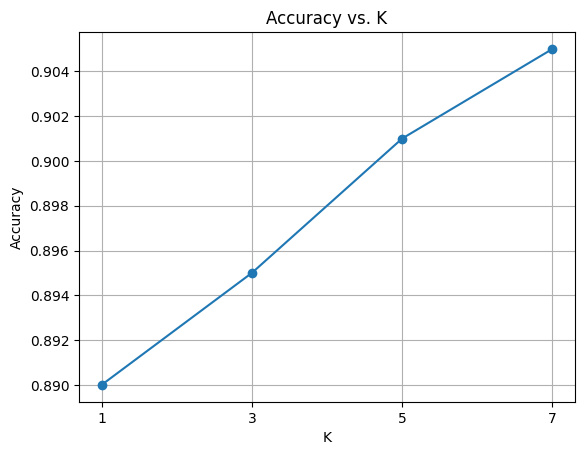

In [22]:
accuracies = [0.89,0.895,0.901,0.905]
plt.plot(k, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k)
plt.grid(True)
plt.show()